In [14]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

BATCHES = 50

In [2]:
class BatchSampler(object):
    '''
    A (very) simple wrapper to randomly sample batches without replacement.

    You shouldn't need to touch this.
    '''
    
    def __init__(self, data, targets, batch_size):
        self.num_points = data.shape[0]
        self.features = data.shape[1]
        self.batch_size = batch_size

        self.data = data
        self.targets = targets

        self.indices = np.arange(self.num_points)

    def random_batch_indices(self, m=None):
        '''
        Get random batch indices without replacement from the dataset.

        If m is given the batch will be of size m. Otherwise will default to the class initialized value.
        '''
        if m is None:
            indices = np.random.choice(self.indices, self.batch_size, replace=False)
        else:
            indices = np.random.choice(self.indices, m, replace=False)
        return indices 

    def get_batch(self, m=None):
        '''
        Get a random batch without replacement from the dataset.

        If m is given the batch will be of size m. Otherwise will default to the class initialized value.
        '''
        indices = self.random_batch_indices(m)
        X_batch = np.take(self.data, indices, 0)
        y_batch = self.targets[indices]
        return X_batch, y_batch 

In [3]:
def load_data_and_init_params():
    '''
    Load the Boston houses dataset and randomly initialise linear regression weights.
    '''
    print('------ Loading Boston Houses Dataset ------')
    X, y = load_boston(True)
    features = X.shape[1]

    # Initialize w
    w = np.random.randn(features)

    print("Loaded...")
    print("Total data points: {0}\nFeature count: {1}".format(X.shape[0], X.shape[1]))
    print("Random parameters, w: {0}".format(w))
    print('-------------------------------------------\n\n\n')

    return X, y, w

In [4]:
def cosine_similarity(vec1, vec2):
    '''
    Compute the cosine similarity (cos theta) between two vectors.
    '''
    dot = np.dot(vec1, vec2)
    sum1 = np.sqrt(np.dot(vec1, vec1))
    sum2 = np.sqrt(np.dot(vec2, vec2))

    return dot / (sum1 * sum2)

In [5]:
#TODO: implement linear regression gradient
def lin_reg_gradient(X, y, w):
    '''
    Compute gradient of linear regression model parameterized by w
    '''
    n = X.shape[0]
    grad = (2 / n) * (X.T.dot(X).dot(w) - X.T.dot(y))
    return grad

In [6]:
# this is for part 3, question 5
def grad_metrics():
    # Load data and randomly initialise weights
    X, y, w = load_data_and_init_params()
    # Create a batch sampler to generate random batches from data
    batch_sampler = BatchSampler(X, y, BATCHES)

    # Example usage
    K = 500
    batch_grad = np.zeros(X.shape[1])
    for k in range(K):
        X_b, y_b = batch_sampler.get_batch()
        batch_grad += lin_reg_gradient(X_b, y_b, w)
    batch_grad /= K
    # gradient from the whole batch
    grad = lin_reg_gradient(X, y, w)
    # metrics
    distance = np.sum((grad - batch_grad)**2)
    cosine = np.inner(grad, batch_grad) / (np.linalg.norm(grad) * np.linalg.norm(batch_grad))
    
    print("Distance:" + str(distance))
    print("Cosine:" + str(cosine))

In [27]:
# this is for part 3, question 6
def single_param_variance(j):
    # Load data and randomly initialise weights
    X, y, w = load_data_and_init_params()
    # m in the range [1,400]
    m = np.logspace(start=0, stop=np.log(400)/np.log(10), base=10)
    logvar = []
    for batch_size in m:
        # Create a batch sampler to generate random batches from data
        batch_sampler = BatchSampler(X, y, int(batch_size))
        
        # Example usage
        K = 500
        w_j = []
        for k in range(K):
            X_b, y_b = batch_sampler.get_batch()
            w_j.append(lin_reg_gradient(X_b, y_b, w)[j])
        var = np.var(w_j)
        logvar.append(np.log(var))
    plt.plot(np.log(m), logvar)
    plt.xlabel('log(m)')
    plt.ylabel('log(var)')
    plt.show()

------ Loading Boston Houses Dataset ------
Loaded...
Total data points: 506
Feature count: 13
Random parameters, w: [ 0.31097464 -0.77104338  0.49490159 -0.03276172  2.97894333 -1.64732971
  0.48285762 -0.05158521 -0.20934033  1.01311468 -0.52897863  0.93572114
 -0.03529051]
-------------------------------------------



Distance:7167617.15175
Cosine:0.999997378138
------ Loading Boston Houses Dataset ------
Loaded...
Total data points: 506
Feature count: 13
Random parameters, w: [-0.12239772 -1.49423403 -1.41219723  1.45676921 -0.9331432  -0.01935483
  1.13400765  0.32318788 -0.09767224  1.39222527  0.4026519   0.39587397
 -0.42047617]
-------------------------------------------





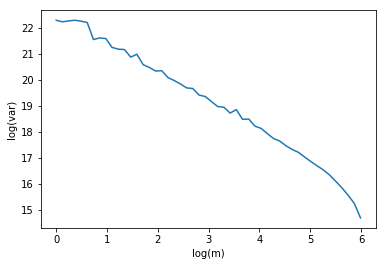

In [28]:
def main():
    grad_metrics()
    # for q6 we pick j=6 for instance
    single_param_variance(6)
                         
if __name__ == '__main__':
    main()